
#Data Visualization with Haberman Dataset
##1.Business Problem
###1.1 Description


The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
###Problem Statement

Perform EDA on Haberman Dataset
##1.2 Source

https://www.kaggle.com/gilsousa/habermans-survival-data-set


In [2]:
#importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#ignore warning messages
import warnings
warnings.filterwarnings('ignore')


##1.Overview
###1.1 DataPrepration

In [4]:
#reading csv file and nameing coloumns as "Age", "Operation_Year", "axil_nodes", "Surv_status"
HCS=pd.read_csv("haberman.csv",names = ["Age", "Operation_Year", "axil_nodes", "Surv_status"])
#print the shape of HCS dataFrame
print(HCS.shape)
#checking if there is any nan value
print(HCS.isnull().values.any())



(306, 4)
False


In [5]:
#counting the no of point based upon survival status
HCS["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

In [6]:
#finding the min and max age
print(HCS["Age"].min())
print(HCS["Age"].max())

30
83


Conclusion

1.Total datapoint 306 and 4 attribute

2.isnull() return false so there is no nan value so we are good to go

3.From above value we can conclude that out of 306 patient 225 patient survived for 5 years or longer while 81 patient die within 5 year.

4.Min age of patient is 30

5.Max age of pateint is 83


##1.2 High level statistics

In [7]:


print("Median")
print(np.median(HCS["Age"]))
print(np.median(HCS["axil_nodes"]))
HCS.describe()



Median
52.0
1.0


,Age,Operation_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000



#2.Objective

To predict Patient survived more than 5 years or die within 5 years based upon their Age,AxilNode
##3.Univaraite analysis
###3.1 PDF

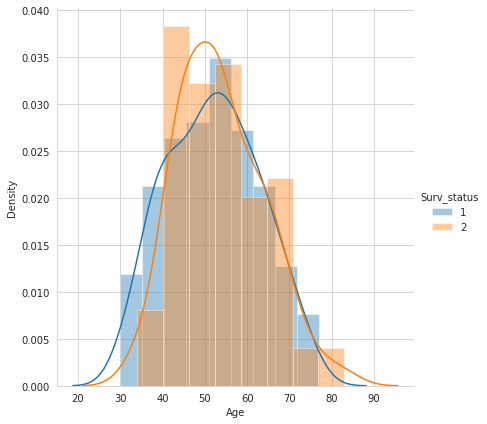

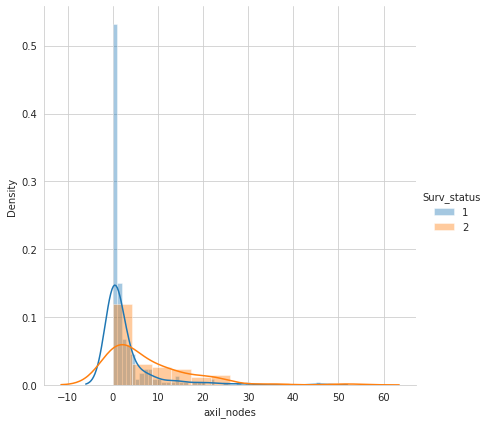

In [8]:
sns.set_style('whitegrid')
sns.FacetGrid(HCS, hue="Surv_status",height=6).map(sns.distplot,"Age").add_legend()
sns.FacetGrid(HCS, hue="Surv_status",height=6).map(sns.distplot,"axil_nodes").add_legend()
plt.show()


#Conclusion

1.Age Pdf-No of Patient died between age 40-70 is high and most patient died at age 50
-No of Patient survived between age 30-40 is high and most patient survived at age 55

2.axil_node pdf-no of patient survived is more when axilNode is between 0-5.
-no of patient died is more when axilNode is between 5-30. as axilNode is increasing reduce the chance of survival
##3.2 CDF
###3.2.1 AGE CDF

In [9]:
status_1=HCS[HCS["Surv_status"]==1]
status_2=HCS[HCS["Surv_status"]==2]

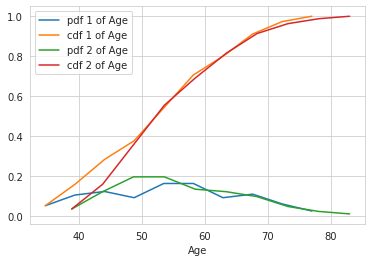

In [10]:


#calucating pdf and cdf Age of pateint survived  >5years
counts, bin_edges = np.histogram(status_1["Age"], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf 1 of Age")
plt.plot(bin_edges[1:], cdf,label="cdf 1 of Age")

#calucating pdf and cdf Age of pateint died within 5 years  
counts, bin_edges = np.histogram(status_2["Age"], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf 2 of Age")
plt.plot(bin_edges[1:], cdf,label="cdf 2 of Age")
plt.xlabel("Age")
plt.legend()
plt.show()




C#onclusion

-40% chances of surviving when age is around 45 as cdf1(cdf of survived pateint) is more than cdf2(cdf of dead pateint) between age 30-45 so there are more chances of surival.
###3.2.2 AxilNode CDF

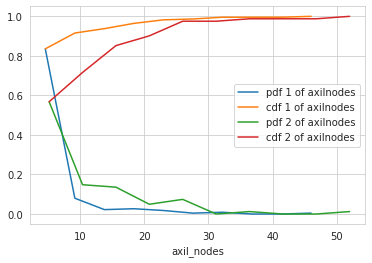

In [11]:
#calucating pdf and cdf Age of pateint survied>5 years
counts, bin_edges = np.histogram(status_1["axil_nodes"], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf 1 of axilnodes")
plt.plot(bin_edges[1:], cdf,label="cdf 1 of axilnodes")

#calucating pdf and cdf Age of pateint died within 5 years
counts, bin_edges = np.histogram(status_2["axil_nodes"], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf 2 of axilnodes")
plt.plot(bin_edges[1:], cdf,label="cdf 2 of axilnodes")
plt.xlabel("axil_nodes")
plt.legend()
plt.show()


#Conclusion

cdf1(cdf of survived pateint) is more than cdf2(cdf of dead pateint) so survival chance are more
##3.3 BoxPlot

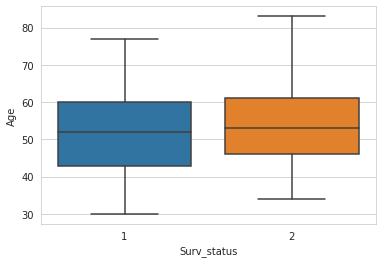

In [12]:
#Boxplot using Age and surv_staus
sns.boxplot(x='Surv_status',y='Age', data=HCS)
plt.show()

#Conclusion

From survived patient>5years{1}
-Median=52
-25percentile=44
-75percentile=61
From pateint died within 5 years{2}
-Median=53
-25pecentile=46
-75percentile=61

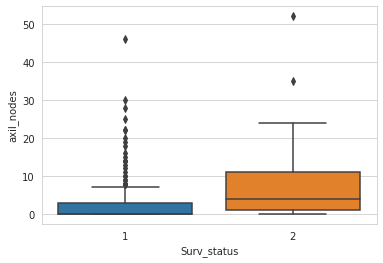

In [13]:
#Boxplot using AxilNode and surv_staus
sns.boxplot(x='Surv_status',y='axil_nodes', data=HCS)
plt.show()


#Conclusion

From survived patient>5years{1}
-Median=0
-25percentile=0
-75percentile=3
From pateint died within 5 years{2}
-Median=4
-25pecentile=1
-75percentile=11
##3.4 violinPlot

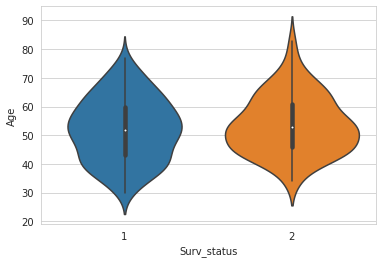

In [14]:
#violinPlot using Age and surv_staus
sns.violinplot(x='Surv_status',y='Age',data=HCS)
plt.show()

#Conclusion

From survived patient>5years{1}
-Median=52
-25percentile=44
-75percentile=61
From pateint died within 5 years{2}
-Median=53
-25pecentile=46
-75percentile=61

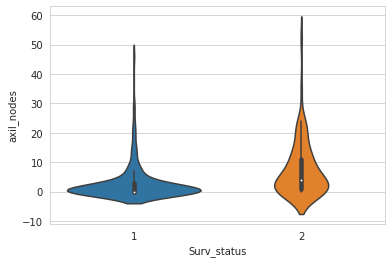

In [15]:
#violinPlot using axil_nodes and surv_staus
sns.violinplot(x='Surv_status',y='axil_nodes',data=HCS)
plt.show()


#Conclusion

From survived patient>5years{1}
-Median=0
-25percentile=0
-75percentile=3
From pateint died within 5 years{2}
-Median=4
-25pecentile=1
-75percentile=11
##.Bi-variate analysis

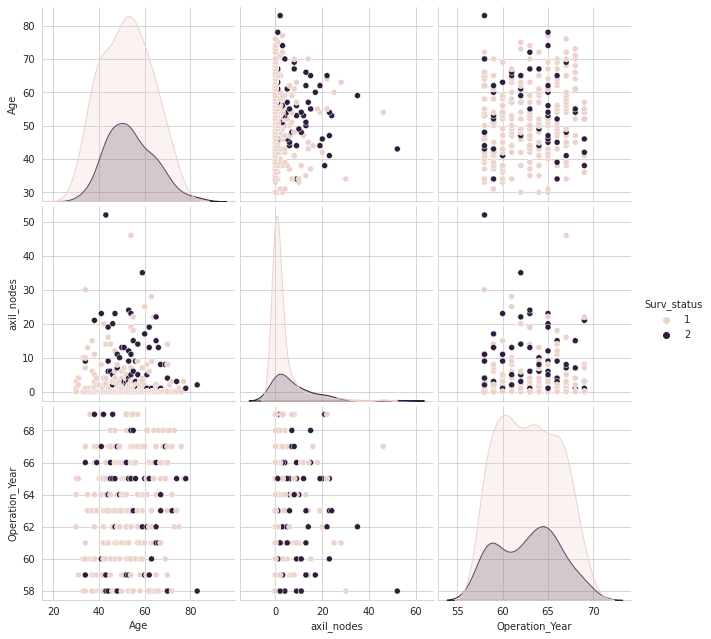

In [16]:
sns.set_style("whitegrid")
#df = HCS.drop(columns = ['Surv_status'])
sns.pairplot(HCS, hue='Surv_status', size=3,vars=["Age", "axil_nodes","Operation_Year"])
plt.show()


#Conclusion

All the datapoint are inseparable it is very diffcult to predict to patient will survived >5years or not using bi-variate analysis

#**Final conclusion**

1.Age-No of Patient died between age 40-70 is high and most patient died at age 50 -No of Patient survived between age 30-40 is high and most patient survived at age 55

2.axil_node-no of patient survived is more when axilNode is between 0-5. -no of patient died is more when axilNode is between 5-30. as axilNode is increasing reduce the chance of survival

3.40% chances of surviving when age is around age 45 between age 30-45 so there are more chances of surival.

4.percentage of survival is more when axil node is between from 0 to 5.
